# <div align="center"> CycleGAN: horse2zebra  </div>

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
import time
import os
import base64
import requests
import json
import base64
from io import BytesIO
from PIL import Image
from IPython.display import HTML
from k12libs.utils.nb_easy import k12ai_get_data

In [3]:
g_host = '116.85.5.40'
g_port = 8119
g_user = '16601548608'
g_uuid = '300'

api = 'k12ai/framework/execute'

In [4]:
config = {
    'dataroot': '/datasets/apple2orange',
    'checkpoints_dir': '/cache/ckpts',
    'model': 'cycle_gan',
    'netD': 'basic',
    'netG': 'resnet_9blocks',
    'norm': 'instance',
    'init_type': 'normal',
    'init_gain': 0.02,
    'no_dropout': True,
    'dataset_mode': 'unaligned',
    'direction': 'AtoB',
    'num_threads': 8,
    'batch_size': 4,
    'no_flip': True,
    'print_freq': 10,
    'save_latest_freq': 80,
    'continue_train': True,
    'beta1': 0.5,
    'lr': 0.002,
    'lr_policy': 'linear',
    'lr_decay_iters': 10,
    'n_epochs': 10,
    'gan_mode': 'lsgan',
    'results_dir': '/cache/results',
    'num_test': 3,
    'verbose': True,
}

In [5]:
def post_gan_request(uri, op, user, uuid, params=None):
    if not params:
        params = '{}'
    if isinstance(params, dict):
        params = json.dumps(params)
    data = json.loads('''{
        "token": "123456",
        "op":"%s",
        "user": "%s",
        "service_name": "k12gan",
        "service_uuid": "%s",
        "service_params": %s
    }''' % (op, user, uuid, params))
    api = 'http://%s:%d/%s' % (g_host, g_port, uri)
    res = requests.post(url=api, json=data).text
    key = op.split('.')[0]
    return {
        'req': data,
        'res': json.loads(res),
        'key': f'framework/16601548608/{uuid}/{key}'
    }

### 启动训练(train.start)

In [9]:
res = post_gan_request(api, 'train.start', g_user, g_uuid,  config)
res

{'req': {'token': '123456',
  'op': 'train.start',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '300',
  'service_params': {'dataroot': '/datasets/apple2orange',
   'checkpoints_dir': '/cache/ckpts',
   'model': 'cycle_gan',
   'netD': 'basic',
   'netG': 'resnet_9blocks',
   'norm': 'instance',
   'init_type': 'normal',
   'init_gain': 0.02,
   'no_dropout': True,
   'dataset_mode': 'unaligned',
   'direction': 'AtoB',
   'num_threads': 8,
   'batch_size': 4,
   'no_flip': True,
   'print_freq': 10,
   'save_latest_freq': 80,
   'continue_train': True,
   'beta1': 0.5,
   'lr': 0.002,
   'lr_policy': 'linear',
   'lr_decay_iters': 10,
   'n_epochs': 10,
   'gan_mode': 'lsgan',
   'results_dir': '/cache/results',
   'num_test': 3,
   'verbose': True}},
 'res': {'code': 100000, 'message': {'en': 'success', 'cn': '成功'}},
 'key': 'framework/16601548608/300/train'}

In [10]:
k12ai_get_data(res['key'], 'metrics', num=2, waitcnt=60, rm=True)

[{'key': 'framework/16601548608/300/train/metrics/1611728041650',
  'value': {'version': '0.1.0',
   'server': 'localhost:8119',
   'type': 'metrics',
   'appId': 'talentai',
   'token': '123456',
   'user': '16601548608',
   'op': 'train.start',
   'service_name': 'k12gan',
   'service_uuid': '300',
   'timestamp': 1611728041650,
   'datetime': '20210127141401',
   'data': [{'_id_': '29f8d6abe3f2d9fe',
     'category': '训练',
     'type': 'scalar',
     'data': {'title': '训练_学习率',
      'payload': {'x': {'label': 'iteration', 'value': 120},
       'y': [{'label': '学习率', 'value': 0.002}]}}}]}},
 {'key': 'framework/16601548608/300/train/metrics/1611728041716',
  'value': {'version': '0.1.0',
   'server': 'localhost:8119',
   'type': 'metrics',
   'appId': 'talentai',
   'token': '123456',
   'user': '16601548608',
   'op': 'train.start',
   'service_name': 'k12gan',
   'service_uuid': '300',
   'timestamp': 1611728041716,
   'datetime': '20210127141401',
   'data': [{'_id_': '00e1533091c

### 停止训练((train.stop)

In [10]:
post_gan_request(api, 'train.stop', g_user, g_uuid)

{'req': {'token': '123456',
  'op': 'train.stop',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '200',
  'service_params': {}},
 'res': {'code': 100000, 'message': {'en': 'success', 'cn': '成功'}},
 'key': 'framework/16601548608/200/train'}

### 恢复训练(train.resume)

In [11]:
res = post_gan_request(api, 'train.resume', g_user, g_uuid)
res

{'req': {'token': '123456',
  'op': 'train.resume',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '200',
  'service_params': {}},
 'res': {'code': 100000, 'message': {'en': 'success', 'cn': '成功'}},
 'key': 'framework/16601548608/200/train'}

In [12]:
k12ai_get_data(res['key'], 'metrics', num=2, waitcnt=60, rm=True)

[{'key': 'framework/16601548608/200/train/metrics/1611716656263',
  'value': {'version': '0.1.0',
   'server': 'localhost:8119',
   'type': 'metrics',
   'appId': 'talentai',
   'token': '123456',
   'user': '16601548608',
   'op': 'train.resume',
   'service_name': 'k12gan',
   'service_uuid': '200',
   'timestamp': 1611716656263,
   'datetime': '20210127110416',
   'data': [{'_id_': '29f8d6abe3f2d9fe',
     'category': '训练',
     'type': 'scalar',
     'data': {'title': '训练_学习率',
      'payload': {'x': {'label': 'iteration', 'value': 20},
       'y': [{'label': '学习率', 'value': 0.002}]}}}]}},
 {'key': 'framework/16601548608/200/train/metrics/1611716656345',
  'value': {'version': '0.1.0',
   'server': 'localhost:8119',
   'type': 'metrics',
   'appId': 'talentai',
   'token': '123456',
   'user': '16601548608',
   'op': 'train.resume',
   'service_name': 'k12gan',
   'service_uuid': '200',
   'timestamp': 1611716656345,
   'datetime': '20210127110416',
   'data': [{'_id_': '00e1533091

In [13]:
post_gan_request(api, 'train.stop', g_user, g_uuid)
time.sleep(5)

### 启动评估(evaluate.start)

In [6]:
res = post_gan_request(api, 'evaluate.start', g_user, g_uuid, config)
res

{'req': {'token': '123456',
  'op': 'evaluate.start',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '300',
  'service_params': {'dataroot': '/datasets/apple2orange',
   'checkpoints_dir': '/cache/ckpts',
   'model': 'cycle_gan',
   'netD': 'basic',
   'netG': 'resnet_9blocks',
   'norm': 'instance',
   'init_type': 'normal',
   'init_gain': 0.02,
   'no_dropout': True,
   'dataset_mode': 'unaligned',
   'direction': 'AtoB',
   'num_threads': 8,
   'batch_size': 4,
   'no_flip': True,
   'print_freq': 10,
   'save_latest_freq': 80,
   'continue_train': True,
   'beta1': 0.5,
   'lr': 0.002,
   'lr_policy': 'linear',
   'lr_decay_iters': 10,
   'n_epochs': 10,
   'gan_mode': 'lsgan',
   'results_dir': '/cache/results',
   'num_test': 3,
   'verbose': True}},
 'res': {'code': 100000, 'message': {'en': 'success', 'cn': '成功'}},
 'key': 'framework/16601548608/300/evaluate'}

In [7]:
results = {}
data = k12ai_get_data(res['key'], 'metrics', num=6, waitcnt=60, rm=True)
if data is not None:
    for item in data:
        d = item['value']['data'][0]['data']
        title = '_'.join(d['title'].split('_')[1:])
        results[title] = base64.b64decode(d['payload'])
print(len(results))

4


In [8]:
keys = list(results.keys())
print(keys)

def img_show(name):
    if name in keys:
        return Image.open(BytesIO(results[name]))
    return None

['real_A', 'fake_B', 'rec_B', 'rec_A']


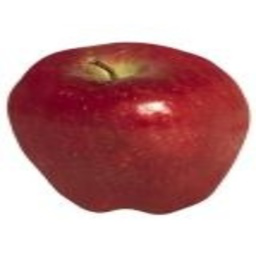

In [9]:
img_show('real_A')

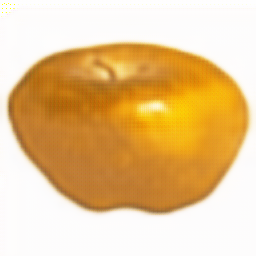

In [10]:
img_show('fake_B')

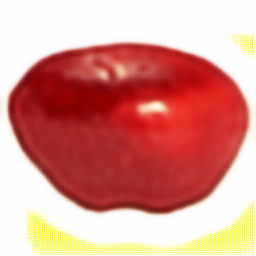

In [11]:
img_show('rec_A')

In [12]:
img_show('real_B')

In [13]:
img_show('fake_A')

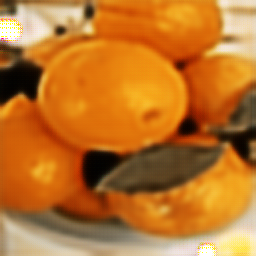

In [14]:
img_show('rec_B')

### 停止评估(evaluate.stop)

In [35]:
post_gan_request(api, 'evaluate.stop', g_user, g_uuid)

{'req': {'token': '123456',
  'op': 'evaluate.stop',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '100',
  'service_params': {}},
 'res': {'code': 100205,
  'message': {'en': 'task is not found or not running',
   'cn': '任务停止错误: 请求的服务不存在或者未启动'}},
 'key': 'framework/16601548608/100/evaluate'}

### 启动预测

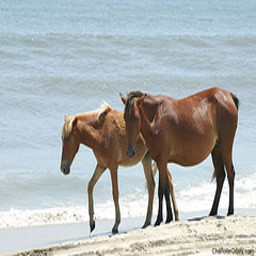

In [36]:
test_pic = '/data/datasets/gan/horse2zebra/testA/n02381460_490.jpg'
img = Image.open(test_pic, mode='r').convert('RGB')
img

In [37]:
with open(test_pic, 'rb') as fr:
    b64str = base64.b64encode(fr.read()).decode()

In [38]:
predict_key = 'framework/16601548608/1/predict'
config_predict = {}
config_predict['b64_image'] = b64str
res = post_gan_request(api, 'predict.start', '16601548608', '1', config_predict)
res

{'req': {'token': '123456',
  'op': 'predict.start',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '1',
  'service_params': {'b64_image': '/9j/4AAQSkZJRgABAQEASABIAAD/4gxYSUNDX1BST0ZJTEUAAQEAAAxITGlubwIQAABtbnRyUkdCIFhZWiAHzgACAAkABgAxAABhY3NwTVNGVAAAAABJRUMgc1JHQgAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLUhQICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABFjcHJ0AAABUAAAADNkZXNjAAABhAAAAGx3dHB0AAAB8AAAABRia3B0AAACBAAAABRyWFlaAAACGAAAABRnWFlaAAACLAAAABRiWFlaAAACQAAAABRkbW5kAAACVAAAAHBkbWRkAAACxAAAAIh2dWVkAAADTAAAAIZ2aWV3AAAD1AAAACRsdW1pAAAD+AAAABRtZWFzAAAEDAAAACR0ZWNoAAAEMAAAAAxyVFJDAAAEPAAACAxnVFJDAAAEPAAACAxiVFJDAAAEPAAACAx0ZXh0AAAAAENvcHlyaWdodCAoYykgMTk5OCBIZXdsZXR0LVBhY2thcmQgQ29tcGFueQAAZGVzYwAAAAAAAAASc1JHQiBJRUM2MTk2Ni0yLjEAAAAAAAAAAAAAABJzUkdCIElFQzYxOTY2LTIuMQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWFlaIAAAAAAAAPNRAAEAAAABFsxYWVogAAAAAAAAAAAAAAAAAAAAAFhZWiAAAAAAAABvogAAOPUAAAOQWFlaIAAAAAAAAGKZAAC3hQAAGNpYWVogAAAAAAAAJKAA

In [39]:
test_results = {}
data = k12ai_get_data(res['key'], 'metrics', num=2, waitcnt=30, rm=True)
if data is not None:
    for item in data:
        d = item['value']['data'][0]['data']
        title = '_'.join(d['title'].split('_')[1:])
        test_results[title] = base64.b64decode(d['payload'])
        
test_keys = list(test_results.keys())
test_keys

['real', 'fake']

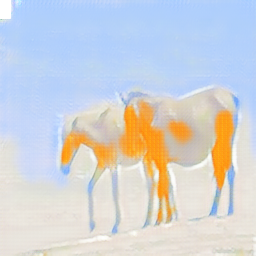

In [40]:
Image.open(BytesIO(test_results['fake']))